# A/B Test for MuscleHub
***

## Introduction

Like most businesses, Janet keeps her data in a SQL database. You have already downloaded the data from her database to a csv file, and will load it into a Jupyter Notebook using pandas to conduct A/B testing for the MuscleHub Gym.

Let's get started!

## Import the dataset

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation. You have already created a csv file for each table.

Import the four csv files as pandas DataFrames and examine them. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
visits = pd.read_csv('visits.csv')
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [8]:
fitness_tests = pd.read_csv("fitness_tests.csv")
fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [9]:
applications = pd.read_csv("applications.csv")
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [10]:
purchases = pd.read_csv("purchases.csv")
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


## Join all of your data

It would be helpful to have a single DataFrame with all of this data. 

Create a DataFrame containing all of this data. Keep in mind that not all visits in **visits.csv** occurred during the A/B test. You’ll only want to pull data where `visit_date` is on or after 7-1-17.


You'll need the following columns:

* `visits.first_name`
* `visits.last_name`
* `visits.gender`
* `visits.email`
* `visits.visit_date`
* `fitness_tests.fitness_test_date`
* `applications.application_date`
* `purchases.purchase_date`

In [11]:
#new visit df with visits on or after 7-1-17
visits = visits[visits['visit_date'] >= '7-1-17']
visits.shape

(5000, 5)

In [12]:
df = visits.merge(fitness_tests,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    applications, on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    purchases, on=['first_name', 'last_name', 'email', 'gender'], how='left')
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


In [13]:
df.shape

(5004, 8)

## Visualize the Groups

Having compiled the DataFrame we can use to begin our project.

Make at least one visualization that depicts the distribution of potential customers that were given a fitness test and those that were not:
- Create a bar plot of the test group variable's distribution.
- Create a pie cart using `plt.pie()`.

In [14]:
#create ab_test_group variable
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x) else 'B' )
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A


<AxesSubplot:xlabel='ab_test_group', ylabel='count'>

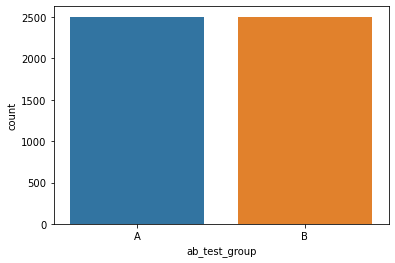

In [15]:
#create bar plot of test group variable's distribution
sns.countplot(data=df, x='ab_test_group')

In [16]:
#determine and obtain total counts
df['ab_test_group'].value_counts()

A    2504
B    2500
Name: ab_test_group, dtype: int64

In [17]:
#A-B Test proportions
df['ab_test_group'].value_counts(normalize=True)

A    0.5004
B    0.4996
Name: ab_test_group, dtype: float64

([<matplotlib.patches.Wedge at 0x161d88d5be0>,
 [Text(-0.0013812939094379835, 1.0999991327392653, 'A'),
  Text(0.0013813968987893594, -1.0999991326099345, 'B')],
 [Text(-0.0007534330415116272, 0.5999995269486901, '50.04%'),
  Text(0.0007534892175214686, -0.5999995268781461, '49.96%')])

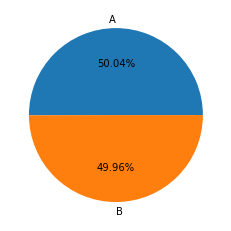

In [18]:
#Pie plot of distributions
plt.pie(df['ab_test_group'].value_counts(), labels=['A','B'], autopct='%0.2f%%')

## Determine the count of applications

Recall that the sign-up process for MuscleHub has several steps:

1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

Determine the percentage of people in each group who complete Step 2, filling out an application.

In [19]:
#create 'application_status' variable
df['application_status'] = df.application_date.apply(lambda x: 'complete' if pd.notnull(x) else 'incomplete' )
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,application_status
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,incomplete
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,incomplete
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,complete
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,complete
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,incomplete


In [20]:
#create application and group table
application_counts = df.groupby(['ab_test_group', 'application_status']).first_name.count().reset_index()
application_counts

,ab_test_group,application_status,first_name
0,A,complete,250
1,A,incomplete,2254
2,B,complete,325
3,B,incomplete,2175


In [21]:
#pivot application_counts df
application_pivot = application_counts.pivot(index='ab_test_group', 
                             columns='application_status', 
                             values='first_name').reset_index()
#create total column for finding proportions
application_pivot['total'] = application_pivot.complete + application_pivot.incomplete
#create column for percentage of complete applications for each group
application_pivot['percent_applied'] = application_pivot.complete / application_pivot.total
application_pivot

application_status,ab_test_group,complete,incomplete,total,percent_applied
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

## Calculate the statistical significance of applications

Having calculated the difference in who turned in an application between groups, determine if this difference is statistically significant.

In [22]:
#Create cross tabb of counts
Xtab = pd.crosstab(df.application_status, df.ab_test_group)
Xtab

ab_test_group,A,B
application_status,,
complete,250,325
incomplete,2254,2175


In [23]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(Xtab)
pval

0.0009647827600722304

Since the p-value is 0.0009, which is less than .05, the difference in complete applications amongst those in Group A and B is statistically significant.  

## Detemine the count of memberships from applications

Of those who picked up an application, how many purchased a membership?

Determine how many potential customers purchased a membership out of those that picked up an application.

It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Why might that be?

In [24]:
#create 'purchased_membership' variable
df['purchased_membership'] = df.purchase_date.apply(lambda x: 'yes' if pd.notnull(x) else 'no' )
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,application_status,purchased_membership
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,incomplete,no
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,incomplete,no
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,complete,yes
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,complete,yes
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,incomplete,no


In [25]:
#Create data frame with applicants only
applicants = df[df.application_status =='complete']
applicants.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,application_status,purchased_membership
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,complete,yes
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,complete,yes
9,Salvador,Cardenas,SCardenas1980@gmail.com,male,7-1-17,2017-07-07,2017-07-06,NaN,A,complete,no
11,Valerie,Munoz,VMunoz1998@gmail.com,female,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,complete,yes
35,Michael,Burks,MB9820@gmail.com,male,7-1-17,NaN,2017-07-07,2017-07-13,B,complete,yes


In [31]:
#create membership table of only applicants
memberships = applicants.groupby(['ab_test_group', 'purchased_membership']).first_name.count().reset_index()

#pivot membership df
memberships_pivot = memberships.pivot(index='ab_test_group', 
                             columns='purchased_membership', 
                             values='first_name').reset_index()
#create total column for finding proportions
memberships_pivot['total'] = memberships_pivot.yes + memberships_pivot.no

#create column for percentage of memberships for each group
memberships_pivot['percent_members'] = memberships_pivot.yes / memberships_pivot.total
memberships_pivot

purchased_membership,ab_test_group,no,yes,total,percent_members
0,A,50,200,250,0.800000
1,B,75,250,325,0.769231


## Calculate the statistical significance of memberships

Calculate if the difference between the following groups is statistically significant: 
- The customers that purchased a membership and took a fitness test.
- The customers that did not take a fitness test and purchased a membership.

In [34]:
#create crosstab for chi2 test
member_xtab = pd.crosstab(applicants.ab_test_group, applicants.purchased_membership)
member_xtab
chi2, pval, dof, expected = chi2_contingency(member_xtab)
pval

0.43258646051083327

The pvalue is too high to to be statistically significant, and causes us to reject the null hypothesis that there is a difference between the number of customers that purchased a membership and did take a fitness test compared to those who did not

## Detemine the count of all memberships

Previously, you looked at what percentage of people who picked up applications purchased memberships. 

Now, determine what percentage of ALL visitors purchased memberships. 

In [37]:
#create membership table of all visitors
all_memberships = df.groupby(['ab_test_group', 'purchased_membership']).first_name.count().reset_index()
#pivot membership df
all_memberships_pivot = all_memberships.pivot(index='ab_test_group', 
                             columns='purchased_membership', 
                             values='first_name').reset_index()
#create total column for finding proportions
all_memberships_pivot['total'] = all_memberships_pivot.yes + all_memberships_pivot.no

#create column for percentage of memberships for each group
all_memberships_pivot['percent_members'] = all_memberships_pivot.yes / all_memberships_pivot.total
all_memberships_pivot

purchased_membership,ab_test_group,no,yes,total,percent_members
0,A,2304,200,2504,0.079872
1,B,2250,250,2500,0.100000


## Calculate the statistical significance between groups

Determine if there is a significant difference in memberships between Group A and Group B.

In [40]:
#create crosstab for chi2 test
all_member_xtab = pd.crosstab(df.ab_test_group, df.purchased_membership)
all_member_xtab

purchased_membership,no,yes
ab_test_group,,
A,2304,200
B,2250,250


In [41]:
chi2, pval, dof, expected = chi2_contingency(all_member_xtab)
pval

0.0147241146457832

The pvalue of .01 with a threshold of .05 is statistically significant.  Therefore we should not reject the null hypothesis that visitors assigned to Group B(no fitness test) will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A.

However, it is important to note that when assessing the groups among those customers that filled out an application, those that completed a fitness test (Group A), were more likely to make a purchase than those customers that did not complete a fitness test (Group B).

## Visualize the results

Create visualizations for Janet that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply.
- Percent of applicants who purchase a membership.
- Percent of visitors who purchase a membership.

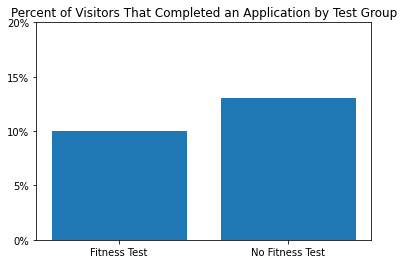

In [72]:
#percent of visitors who apply
ax = plt.subplot()
plt.bar(range(len(application_pivot)),
       application_pivot['percent_applied'].values)
ax.set_xticks(range(len(application_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_title('Percent of Visitors That Completed an Application by Test Group')
plt.show()

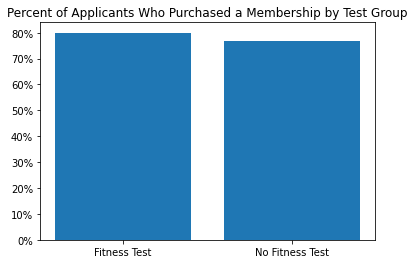

In [74]:
#percent of applicants who purchase a membership
ax = plt.subplot()
plt.bar(range(len(memberships_pivot)),
       memberships_pivot['percent_members'].values)
ax.set_xticks(range(len(memberships_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])
ax.set_title('Percent of Applicants Who Purchased a Membership by Test Group')
plt.show()

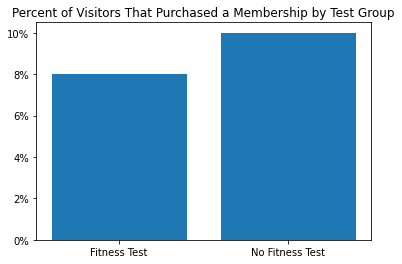

In [77]:
#percent of visitors who purchased a membership
ax = plt.subplot()
plt.bar(range(len(all_memberships_pivot)),
       all_memberships_pivot['percent_members'].values)
ax.set_xticks(range(len(all_memberships_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10])
ax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%'])
ax.set_title('Percent of Visitors That Purchased a Membership by Test Group')
plt.show()

## Congratulations!!

Congratulations, your work has been a valuable contribution for Janet to determine MuscleHub's membership process. Janet asks if you would also help her share your work with a presentation. 

## Challenge Assignment

- Develop a presentation that demonstrates your findings to Janet. She has decided that your recommendation will determine if potential customers should take a fitness test as a component of their application. Your presentation should include the following:
    - A title slide
    - A description of what happened in this A/B test
    - A summary of your dataset and any information you think would be helpful background
    - The results of the three hypothesis tests that you ran, including an explanation of the type of test that you used and why it was appropriate
    - A summary of the qualitative data
    - A recommendation for MuscleHub

- Create a [wordcloud](https://pypi.org/project/wordcloud/) visualization that Janet can use to create an ad for the MuscleHub Gym with the data in `interviews.txt`. 